Você pode acessar a [fonte](https://basedosdados.org/) de coleta dos dados. A fonte primária dos dados utilizados pode ser acessada nos seguintes links:
- [Emissões de gases de efeito estufa no Brasil - UF.csv](https://seeg.eco.br/)
- [Instituto Nacional de Meteorologia (INMET)(2023-2024).csv](https://portal.inmet.gov.br/dadoshistoricos)
- [CatalogoEstaçõesAutomáticas.csv](https://portal.inmet.gov.br/paginas/catalogoaut)

# Iniciando as seleções de dados

In [ ]:
# Definindo a URL de origem dos dados
url_gee = ''

In [ ]:
# Importando a biblioteca Polars para manipulação de dados
import polars as pl

In [ ]:

# Lendo o CSV a partir da URL informada
df = pl.read_csv(url_gee)

<font size=4>[`polars.read_csv`](https://docs.pola.rs/api/python/stable/reference/api/polars.read_csv.html)</font><br>

In [ ]:
# Mostra a forma do DataFrame: número de linhas e colunas
df.shape

(2704488, 12)

<font size=4>[`polars.DataFrame.shape`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.shape.html)</font><br>

In [ ]:
# Mostra as primeiras 5 linhas do DataFrame
df.head()

ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,emissao
i64,str,str,str,str,str,str,str,str,str,str,f64
2002,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CH4 (t)""","""AGR""",0.0
2002,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CO2e (t) GWP-AR5""","""AGR""",0.0
2002,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CH4 (t)""","""PEC""",4.64
2002,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GTP-AR5""","""PEC""",18.56
2002,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GWP-AR5""","""PEC""",129.92


<font size=4>[`polars.DataFrame.head`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.head.html)</font><br>

| Nome   | Descrição   | Tipo |
|-------|-----------|------------|
| ano | Ano                            | INT64            |
| sigla_uf    | Sigla da Unidade da Federação | STRING           |
| nivel_1    | Nível 1 - Setor               | STRING           |
| nivel_2     | Nível 2 - Processo Emissor    | STRING           |
| nivel_3      | Nível 3 - Forma de Emissão    | STRING           |
| nivel_4      | Nível 4 - Processo Específico | STRING           |
| nivel_5       | Nível 5 - Tipo de Atividade   | STRING           |
| nivel_6      | Nível 6 - Atividade Específica| STRING           |
| tipo_emissao   | Tipo de Emissão               | STRING           |
| gas          | Gás                           | STRING           |
| atividade_economica  | Atividade Econômica    | STRING     |
| emissao    | Emissão                       | FLOAT64          |

In [ ]:
# Seleciona apenas as colunas 'ano' e 'emissao' e mostra estatísticas descritivas
df.select(['ano','emissao']).describe()

statistic,ano,emissao
str,f64,f64
"""count""",2.704488e6,2.704488e6
"""null_count""",0.0,0.0
"""mean""",1996.258816,77818.816136
"""std""",14.117135,4.1103e6
"""min""",1970.0,-1.3280e8
"""25%""",1985.0,0.0
"""50%""",1997.0,0.012387
"""75%""",2008.0,822.36085
"""max""",2019.0,5.156e8


<font size=4>[`polars.DataFrame.describe`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.describe.html), [`polars.DataFrame.select`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.select.html)</font><br>



O conceito de carbono negativo seria remover mais do que se emite. Por exemplo, se determinada companhia emite 1 milhão de toneladas de CO2 na atmosfera, para que ela opere em modo carbono negativo, é preciso que ela retire ou retenha mais de 1 milhão de toneladas de CO2 da atmosfera, tornando assim sua emissão de carbono negativa.

> <font size=2>[Fonte.](https://www.bureauveritas.com.br/en/node/4831)</font><br>

In [ ]:
# Ordenando o DataFrame pelo ano
df = df.sort('ano')
df

ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,emissao
i64,str,str,str,str,str,str,str,str,str,str,f64
1970,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CH4 (t)""","""AGR""",0.0
1970,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CO2e (t) GWP-AR5""","""AGR""",0.0
1970,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CH4 (t)""","""PEC""",2.23
1970,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GTP-AR5""","""PEC""",8.92
1970,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GWP-AR5""","""PEC""",62.44
…,…,…,…,…,…,…,…,…,…,…,…
2019,"""TO""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GTP-AR5""","""SANEAMENTO""",141.55963
2019,"""TO""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GWP-AR2""","""SANEAMENTO""",310.74065
2019,"""TO""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GWP-AR4""","""SANEAMENTO""",336.47876


<font size=4>[`polars.DataFrame.sort`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.sort.html)</font><br>

## Remoção de GEE

> Nossa equipe precisa identificar dados de remoção ou compensação de gases de efeito estufa (GEE) no Brasil entre os anos de 2014 e 2019. Essas informações podem ser úteis para avaliar se, além das emissões ativas, existem iniciativas ou processos naturais significativos que estejam reduzindo ou compensando as emissões de CO₂ e outros gases nocivos nesse período. Historicamente, alguns setores ou regiões podem apresentar números expressivos de remoção (por exemplo, áreas que sofrem reflorestamento ou grandes reservas naturais que absorvem carbono). A análise pode ajudar os tomadores de decisão a entender se as remoções/compensações estão crescendo ou diminuindo ao longo dos anos.

<font size=2>[Fonte.](https://www.wribrasil.org.br/noticias/estes-40-casos-mostram-como-o-reflorestamento-com-nativas-traz-retorno-economico-e)</font><br>

In [ ]:
# Filtrando dados que não correspondem a emissões (ex: remoções de GEE)
df.filter(
    df['tipo_emissao'] != 'Emissão'
)

ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,emissao
i64,str,str,str,str,str,str,str,str,str,str,f64
1970,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2 (t)""","""Conservação""",0.0
1970,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GTP-AR2""","""Conservação""",0.0
1970,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GTP-AR4""","""Conservação""",0.0
1970,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GTP-AR5""","""Conservação""",0.0
1970,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GWP-AR2""","""Conservação""",0.0
…,…,…,…,…,…,…,…,…,…,…,…
2019,"""TO""","""Mudança de Uso da Terra e Flor…","""Remoção por Vegetação Secundár…","""Cerrado""","""fora de Área Protegida""","""Vegetação nativa estável""","""Vegetação não florestal secund…","""Remoção""","""CO2e (t) GTP-AR4""","""AGROPEC""",-216258.0
2019,"""TO""","""Mudança de Uso da Terra e Flor…","""Remoção por Vegetação Secundár…","""Cerrado""","""fora de Área Protegida""","""Vegetação nativa estável""","""Vegetação não florestal secund…","""Remoção""","""CO2e (t) GTP-AR5""","""AGROPEC""",-216258.0
2019,"""TO""","""Mudança de Uso da Terra e Flor…","""Remoção por Vegetação Secundár…","""Cerrado""","""fora de Área Protegida""","""Vegetação nativa estável""","""Vegetação não florestal secund…","""Remoção""","""CO2e (t) GWP-AR2""","""AGROPEC""",-216258.0


<font size=4>[`polars.DataFrame.filter`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.filter.html)</font><br>

In [ ]:
# Filtrando por intervalo de anos
df.filter(
    df['ano'].is_between(2014,2019)
)

ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,emissao
i64,str,str,str,str,str,str,str,str,str,str,f64
2014,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CH4 (t)""","""AGR""",0.0
2014,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CO2e (t) GWP-AR5""","""AGR""",0.0
2014,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CH4 (t)""","""PEC""",8.22
2014,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GTP-AR5""","""PEC""",32.88
2014,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GWP-AR5""","""PEC""",230.16
…,…,…,…,…,…,…,…,…,…,…,…
2019,"""TO""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GTP-AR5""","""SANEAMENTO""",141.55963
2019,"""TO""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GWP-AR2""","""SANEAMENTO""",310.74065
2019,"""TO""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GWP-AR4""","""SANEAMENTO""",336.47876


<font size=4>[`polars.Expr.is_between`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.is_between.html)</font><br>

In [ ]:
# Combinando os filtros
remocao_gases = df.filter(
    df['tipo_emissao'] != 'Emissão',
    df['ano'].is_between(2014,2019)
)
remocao_gases

ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,emissao
i64,str,str,str,str,str,str,str,str,str,str,f64
2014,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2 (t)""","""Conservação""",-9.5785e6
2014,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GTP-AR2""","""Conservação""",-9.5785e6
2014,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GTP-AR4""","""Conservação""",-9.5785e6
2014,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GTP-AR5""","""Conservação""",-9.5785e6
2014,"""AC""","""Mudança de Uso da Terra e Flor…","""Remoção em Áreas Protegidas""","""Amazônia""","""em Área Protegida""","""NÃO SE APLICA""","""NÃO SE APLICA""","""Remoção proxy""","""CO2e (t) GWP-AR2""","""Conservação""",-9.5785e6
…,…,…,…,…,…,…,…,…,…,…,…
2019,"""TO""","""Mudança de Uso da Terra e Flor…","""Remoção por Vegetação Secundár…","""Cerrado""","""fora de Área Protegida""","""Vegetação nativa estável""","""Vegetação não florestal secund…","""Remoção""","""CO2e (t) GTP-AR4""","""AGROPEC""",-216258.0
2019,"""TO""","""Mudança de Uso da Terra e Flor…","""Remoção por Vegetação Secundár…","""Cerrado""","""fora de Área Protegida""","""Vegetação nativa estável""","""Vegetação não florestal secund…","""Remoção""","""CO2e (t) GTP-AR5""","""AGROPEC""",-216258.0
2019,"""TO""","""Mudança de Uso da Terra e Flor…","""Remoção por Vegetação Secundár…","""Cerrado""","""fora de Área Protegida""","""Vegetação nativa estável""","""Vegetação não florestal secund…","""Remoção""","""CO2e (t) GWP-AR2""","""AGROPEC""",-216258.0


In [ ]:
# Salvando os dados de remoção em CSV
remocao_gases.write_csv('GEE Brasil - Valores de remoção.csv')

<font size=4>[`polars.DataFrame.write_csv`](https://docs.pola.rs/api/python/stable/reference/api/polars.DataFrame.write_csv.html)</font><br>

## Separando dados por UF

> Outra informação que precisamos receber está associado aos valores de emissão de GEE nos anos de 2009 a 2019 no Pará. O Pará está localizado na região amazônica, historicamente impactada por desmatamento e mudanças no uso da terra, o que pode influenciar diretamente as emissões de gases de efeito estufa. Levar esses dados para a equipe vai permitir que análises sejam feitas para verificar se existe tendência de aumento ou redução e relacionar com potenciais políticas públicas de controle e manejo sustentável.

<font size=2>[Fonte 1,](https://cnm.org.br/comunicacao/noticias/desmatamento-na-amaz%C3%B4nia-contribui-com-25-da-emiss%C3%A3o-de-gees) [Fonte 2.](https://energiaeambiente.org.br/oito-dos-dez-municipios-que-mais-emitem-gases-de-efeito-estufa-estao-na-amazonia-20220617)</font><br>

In [ ]:
# Separando dados por Unidade Federativa (UF)
dados_para = df.filter(
    df['ano'].is_between(2009,2019),
    df['tipo_emissao'] == 'Emissão',
    df['sigla_uf'].is_in(['PA'])
)
dados_para

ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,emissao
i64,str,str,str,str,str,str,str,str,str,str,f64
2009,"""PA""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CH4 (t)""","""AGR""",0.0
2009,"""PA""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CO2e (t) GWP-AR5""","""AGR""",0.0
2009,"""PA""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CH4 (t)""","""PEC""",209.98
2009,"""PA""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GTP-AR5""","""PEC""",839.92
2009,"""PA""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GWP-AR5""","""PEC""",5879.44
…,…,…,…,…,…,…,…,…,…,…,…
2019,"""PA""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GTP-AR5""","""SANEAMENTO""",768.63942
2019,"""PA""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GWP-AR2""","""SANEAMENTO""",1687.2573
2019,"""PA""","""Resíduos ""","""Resíduos Sólidos""","""Tratamento Biológico de Resídu…","""Resíduos Sólidos Urbanos""","""Compostagem""","""NÃO SE APLICA ""","""Emissão""","""CO2e (t) GWP-AR4""","""SANEAMENTO""",1827.0099


<font size=4>[`polars.Expr.is_in`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.is_in.html)</font><br>

In [ ]:
# Separando dados por Unidade Federativa (UF)
dados_para.write_csv('GEE Brasil - PA 2009-2019.csv')

# Aula 2 - Selecionando valores GEE através de textos

## Encontrando as emissões de NOx

In [ ]:
df['gas'].unique().to_list()

['CO2e (t) GTP-AR4',
 'C2F6 (t)',
 'CO2e (t) GWP-AR4',
 'CO2e (t) GTP-AR5',
 'COVNM (t)',
 'CO2e (t) GTP-AR2',
 'CF4 (t)',
 'CO (t)',
 'NOX (t)',
 'N2O (t)',
 'CH4 (t)',
 'SF6 (t)',
 'NOx (t)',
 'CO2e (t) GWP-AR2',
 'CO2 (t)',
 'CO2e (t) GWP-AR5']

<font size=4>[`polars.Expr.unique`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.unique.html), [`polars.Expr.arr.to_list`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.arr.to_list.html)</font><br>

> Os óxidos de nitrogênio (NOx) compõe o GEE. No entanto, no conjunto de dados, há colunas separadas para “NOx” e “NOX” que, na prática, representam a mesma categoria, mas foram preenchidas de forma distinta. Nossa equipe deseja obter o valor total registrado de óxidos de nitrogênio no ano de 2019, buscando uma análise consistente das emissões.

<font size=2>[Fonte.](https://www.em.com.br/app/noticia/internacional/2015/11/04/interna_internacional,704478/o-nox-um-contaminante-atmosferico-e-o-co2-um-gas-de-efeito-estufa.shtml)</font><br>


In [ ]:
df.filter(pl.col('gas').str.contains('NO'))['gas'].unique()

gas
str
"""NOX (t)"""
"""NOx (t)"""


<font size=4>[`polars.Expr.str.contains`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.str.contains.html)</font><br>

In [ ]:
total_nox = (
    df.filter(pl.col('gas').str.contains('NO'), df['ano'] == 2019)
    .select(pl.col('emissao').sum())
    .item()
)
print(f'Total de emissões de NOx em 2019: {total_nox}')

Total de emissões de NOx em 2019: 2168680.456225528


<font size=4> [`polars.Expr.sum`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.sum.html), [`polars.DataFrame.item`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.item.html)</font><br>

## Entendendo as emissões de NOx

> As emissões de óxidos de nitrogênio (NOx) estão associadas a diversas atividades industriais e de transporte. No entanto, para uma análise mais específica, nossa equipe deseja compreender quais formas de emissão dentro dessas categorias mais contribuem para as emissões. A separação por formas industriais, transportes e produção permitirá identificar padrões e subsidiar decisões voltadas para mitigação e controle de poluentes.

<font size=2>[Fonte traduzida com Google Tradutor.](https://www-noxfondet-no.translate.goog/en/articles/what-is-nox/?_x_tr_sl=pt&_x_tr_tl=en&_x_tr_hl=pt-BR&_x_tr_pto=wapp)</font><br>


In [ ]:
df_nox = df.filter(pl.col('gas').str.contains('NO'))

In [ ]:
df_nox['nivel_3'].unique()

nivel_3
str
"""Produção de Ferro Gusa e Aço"""
"""Agropecuário"""
"""Transportes"""
"""Produção de Ácido Adípico"""
"""Produção de Ácido Nítrico"""
…
"""Residencial"""
"""Comercial"""
"""Geração de Eletricidade (Servi…"


In [ ]:
df_nox.filter(df_nox['nivel_3'].is_in(['Industrial', 'Transportes', 'Produção']))['nivel_3'].unique()

nivel_3
str
"""Transportes"""
"""Industrial"""


In [ ]:
df_nox_filtrado = df_nox.filter(df_nox['nivel_3'].str.contains(r'Industrial|Transportes|Produção'))
df_nox_filtrado['nivel_3'].unique()

nivel_3
str
"""Produção de Ferro Gusa e Aço"""
"""Transportes"""
"""Produção de Ácido Nítrico"""
"""Produção de Ferroligas"""
"""Industrial"""
"""Produção de Ácido Adípico"""
"""Produção de Combustíveis"""


In [ ]:
df_nox_nivel3 = (
    df_nox_filtrado.group_by('nivel_3')
    .agg(pl.col('emissao').sum().alias('total_emissao_nox'))
    .sort('total_emissao_nox', descending=True)
)
df_nox_nivel3

nivel_3,total_emissao_nox
str,f64
"""Transportes""",4.0508e7
"""Produção de Combustíveis""",6.2774e6
"""Industrial""",3.2843e6
"""Produção de Ferro Gusa e Aço""",2.3181e6
"""Produção de Ferroligas""",71470.465074
"""Produção de Ácido Nítrico""",26718.266157
"""Produção de Ácido Adípico""",14627.81


<font size=4>[`polars.DataFrame.group_by`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.group_by.html), [`polars.dataframe.group_by.GroupBy.agg`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.dataframe.group_by.GroupBy.agg.html), [`polars.dataframe.group_by.GroupBy.sum`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.dataframe.group_by.GroupBy.sum.html), [`polars.Expr.alias`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.alias.html)</font><br>

In [ ]:
import matplotlib.pyplot as plt

def tabela(df, titulo = '', nota='', tamanho = (7, 2)):
  # Criar a figura e o eixo
  fig, ax = plt.subplots(figsize=tamanho)  # Ajuste o tamanho conforme necessário
  ax.axis('off')

  # Criar tabela
  tabela = ax.table(cellText=df.to_pandas().round(2).values,
                    colLabels=df.columns,
                    colColours=['#D3D3D3'] * len(df.columns),
                    cellLoc='center',
                    loc='center')
  # Adicionar um título
  plt.title(titulo)

  # Adcionar uma nota
  if nota!='':
    plt.figtext(0.5, 0.02, f'Nota: {nota}',
                ha='center', fontsize=8, fontstyle='italic')
  # Salvar como imagem
  plt.savefig(f'TABELA - {titulo}.png', dpi=300, bbox_inches='tight')

  # Exibir a imagem
  plt.show()

<font size=4>[`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)</font><br>

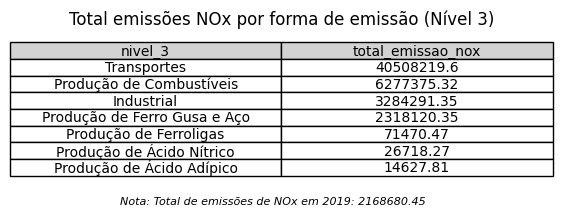

In [ ]:
tabela(df_nox_nivel3, 'Total emissões NOx por forma de emissão (Nível 3)',
       nota = 'Total de emissões de NOx em 2019: 2168680.45')

> Além de entender quais formas mais contribuem para as emissões de NOx, é importante analisar essas emissões em um nível mais amplo. Por isso é necessário identificar a relação entre categorias gerais de setores (nível 1) e as formas de emissão (nível 3) para compreender melhor a estrutura das emissões e possíveis alvos para redução.


In [ ]:
df_nox_nivel1_nivel3 = (
    df_nox_filtrado.group_by(['nivel_1', 'nivel_3'])
    .agg(pl.col('emissao').sum().alias('total_emissao_nox'))
    .sort('total_emissao_nox', descending=True)
)
df_nox_nivel1_nivel3

nivel_1,nivel_3,total_emissao_nox
str,str,f64
"""Energia""","""Transportes""",4.0508e7
"""Energia""","""Produção de Combustíveis""",6.2774e6
"""Energia""","""Industrial""",3.2843e6
"""Processos Industriais""","""Produção de Ferro Gusa e Aço""",2.3181e6
"""Processos Industriais""","""Produção de Ferroligas""",71470.465074
"""Processos Industriais""","""Produção de Ácido Nítrico""",26718.266157
"""Processos Industriais""","""Produção de Ácido Adípico""",14627.81


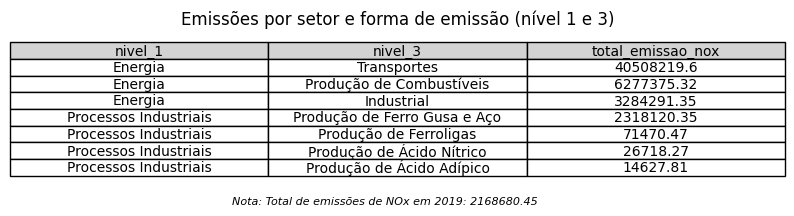

In [ ]:
tabela(df_nox_nivel1_nivel3, 'Emissões por setor e forma de emissão (nível 1 e 3)',
       nota = 'Total de emissões de NOx em 2019: 2168680.45', tamanho = (10,2))

# Aula 3 - Explorando categorias de GEE

## Reclassificando os gases emitidos

In [ ]:
df['gas'].unique().to_list()

['CO2e (t) GWP-AR2',
 'CO2e (t) GTP-AR5',
 'CO2e (t) GTP-AR4',
 'N2O (t)',
 'CO2 (t)',
 'CH4 (t)',
 'NOx (t)',
 'CO (t)',
 'CF4 (t)',
 'NOX (t)',
 'COVNM (t)',
 'SF6 (t)',
 'CO2e (t) GWP-AR4',
 'CO2e (t) GWP-AR5',
 'C2F6 (t)',
 'CO2e (t) GTP-AR2']

**Lista de GEE:**

1. CO2 - Dióxido de Carbono.
2. CH4 - Metano.
3. N2O - Óxido Nitroso.  
4. NOx/NOX - óxidos de nitrogênio - um conjunto de gases contendo nitrogênio e oxigênio.
5. CO - Monóxido de Carbono.  
6. COVNM - Compostos Orgânicos Voláteis Não Metanosos.
7. CF4 - Tetrafluorometano.
8. C2F6 - Hexafluoretano.
9. SF6 - Hexafluoreto de Enxofre.

<font size=2>[Fonte.](https://semil.sp.gov.br/educacaoambiental/prateleira-ambiental/gases-de-efeito-estufa-gee/)</font><br>

**O que é “CO2e”?**

CO2e significa “**dióxido de carbono equivalente**”. É uma forma de padronizar o impacto dos diferentes gases usando o CO2 como referência.

A diferença entre “GWP” e “GTP” muda a forma de calcular o fator de conversão para “CO2 equivalente”, e a diferença entre “AR2”, “AR4” e “AR5” reflete as atualizações e melhorias científicas entre cada relatório do [IPCC](https://www.ipcc.ch/about/)

- Caso tenha interesse, consulte a [tabela com valores equivalentes por tipo de gás](https://ghgprotocol.org/sites/default/files/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf)

> A análise das emissões de gases de efeito estufa (GEE) frequentemente requer a categorização dos diferentes tipos de gases para facilitar a interpretação e comparação dos dados. Nossa equipe deseja agrupar os gases reportados no conjunto de dados em categorias padronizadas (CO₂, CO₂ equivalente, CH₄, N₂O e Outros) e, a partir disso, entender a distribuição das emissões em 2019.

In [ ]:
df_gases = df.with_columns(
    pl.when(pl.col('gas').str.contains('CO2 '))
    .then(pl.lit('CO2'))
    .when(pl.col('gas').str.contains('CO2e'))
    .then(pl.lit('CO2_equivalente'))
    .when(pl.col('gas').str.contains('CH4'))
    .then(pl.lit('CH4'))
    .when(pl.col('gas').str.contains('N2O'))
    .then(pl.lit('N2O'))
    .otherwise(pl.lit('Outros'))
    .alias('categoria_gas')
)

<font size=4>[`polars.DataFrame.with_columns`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.with_columns.html), [`polars.when`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.when.html)</font><br>
- <font size=3>expressão `when-then-otherwise`</font><br>

In [ ]:
df_gases.head()

ano,sigla_uf,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,emissao,categoria_gas
i64,str,str,str,str,str,str,str,str,str,str,f64,str
1970,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CH4 (t)""","""AGR""",0.0,"""CH4"""
1970,"""AC""","""Agropecuária""","""Cultivo do Arroz""","""Diretas""","""Outros""","""Vegetal""","""Arroz""","""Emissão""","""CO2e (t) GWP-AR5""","""AGR""",0.0,"""CO2_equivalente"""
1970,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CH4 (t)""","""PEC""",2.23,"""CH4"""
1970,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GTP-AR5""","""PEC""",8.92,"""CO2_equivalente"""
1970,"""AC""","""Agropecuária""","""Fermentação Entérica""","""Diretas""","""Outros""","""Animal""","""Asinino""","""Emissão""","""CO2e (t) GWP-AR5""","""PEC""",62.44,"""CO2_equivalente"""


In [ ]:
df_resultados = (
    df_gases.filter(df_gases['ano']==2019)
    .group_by('categoria_gas')
    .agg(pl.col('emissao').sum().alias('total_emissao'))
    .sort('total_emissao', descending=True)
)
df_resultados

categoria_gas,total_emissao
str,f64
"""CO2_equivalente""",2.9243e9
"""CO2""",2.8345e8
"""CH4""",1.9884e7
"""Outros""",9.7713e6
"""N2O""",494181.089969


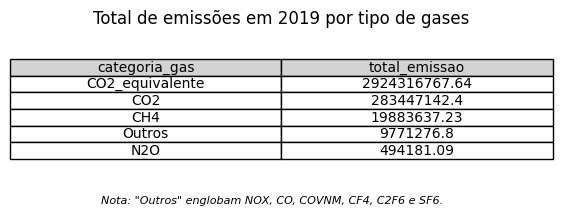

In [ ]:
tabela(df_resultados, 'Total de emissões em 2019 por tipo de gases',
       nota = '"Outros" englobam NOX, CO, COVNM, CF4, C2F6 e SF6.')

## Avaliando os valores de emissão por setor

> Agora nosso objetivo é entender melhor a evolução das emissões de gases de efeito estufa ao longo do tempo de acordo com os setores responsáveis por essas emissões. Nossa equipe deseja verificar como diferentes categorias de setores econômicos (nível 1) contribuíram para as emissões após 2010, possibilitando a identificação de tendências e potenciais mudanças nos padrões de poluição ao longo dos anos. Uma visualização é a forma ideal de apresentar essa informação.

<font size=2>[Fonte.](https://www.uol.com.br/ecoa/faq/quais-sao-setores-economicos-que-mais-impactam-o-aquecimento-global.htm)</font><br>


In [ ]:
df_setor = (
    df.filter(df['ano'] > 2010, df['tipo_emissao']=='Emissão')
    .group_by(['ano','nivel_1'])
    .agg(pl.col('emissao').sum().alias('total emissao'))
    .sort(['ano','nivel_1'])
)
df_setor

ano,nivel_1,total emissao
i64,str,f64
2011,"""Agropecuária""",5.8513e8
2011,"""Energia""",2.3905e9
2011,"""Mudança de Uso da Terra e Flor…",4.2466e9
2011,"""Processos Industriais""",5.0315e8
2011,"""Resíduos """,2.6408e8
…,…,…
2019,"""Agropecuária""",6.0219e8
2019,"""Energia""",2.5590e9
2019,"""Mudança de Uso da Terra e Flor…",6.5718e9


In [ ]:
import plotly.express as px

df_setor_pd = df_setor.to_pandas()

fig = px.bar(
    df_setor_pd,
    x = 'ano',
    y = 'total emissao',
    color = 'nivel_1',
    barmode = 'group',
    title = 'Valores de emissão por ano e categorias de setores'
)
fig.show()

<font size=4>[`plotly.express`](https://plotly.com/python/plotly-express/)</font><br>

# Aula 4 - Entendendo dados climáticos através de agrupamentos

In [ ]:
url_m = ''

In [ ]:
dm = pl.read_csv(url_m, try_parse_dates=True)
dm.head()

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64
2023,2023-10-19,21:00:00,"""A427""",0.0,1006.0,41.8,25.9,24.6,73,67,1.0
2023,2023-07-26,15:00:00,"""A831""",0.0,1003.7,599.4,14.5,13.9,92,240,5.2
2023,2023-11-13,21:00:00,"""A939""",0.0,983.9,885.2,35.1,33.8,45,347,2.1
2023,2023-11-30,12:00:00,"""A567""",0.0,906.0,1254.2,21.6,19.8,91,290,0.7
2023,2023-02-24,06:00:00,"""A254""",null,null,null,null,null,null,null,null


| Nome     | Descrição       | Tipo    |
|---------------------|----------------|---------|
| **ano**    | Ano do  registro    | INT64   |
| **data**            | Data do registro (formato YYYY-MM-DD)                                     | STRING  |
| **hora**            | Hora do registro (formato HH:MM:SS)                                       | STRING  |
| **id_estacao**      | Identificador da estação meteorológica    | STRING  |
| **precipitacao_total** | Total de precipitação acumulada no período (mm)                           | FLOAT64 |
| **pressao_atm_hora** | Pressão atmosférica observada no horário (hPa)                               | FLOAT64 |
| **radiacao_global** | Radiação solar global observada (W/m²)                                     | FLOAT64 |
| **temperatura_max** | Temperatura máxima registrada (°C)                                        | FLOAT64 |
| **temperatura_min** | Temperatura mínima registrada (°C)                                        | FLOAT64 |
| **umidade_rel_hora** | Umidade relativa do ar no horário (%)                                      | INT64   |
| **vento_direcao**   | Direção do vento em graus (0–360°)                                         | INT64   |
| **vento_velocidade**| Velocidade do vento (m/s)                                                 | FLOAT64 |

In [ ]:
dm = dm.sort(['data','hora'])
dm

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64
2023,2023-01-01,00:00:00,"""A357""",null,996.5,null,24.2,22.9,99,83,2.1
2023,2023-01-01,00:00:00,"""A320""",0.0,1009.8,null,24.2,23.9,93,160,0.7
2023,2023-01-01,00:00:00,"""A570""",0.4,904.1,null,19.1,18.4,null,100,1.9
2023,2023-01-01,00:00:00,"""A205""",0.0,990.1,null,26.5,25.8,89,44,1.0
2023,2023-01-01,00:00:00,"""A424""",0.0,928.6,null,21.0,20.1,83,127,1.3
…,…,…,…,…,…,…,…,…,…,…,…
2024,2024-05-30,23:00:00,"""A904""",0.0,971.8,null,27.8,25.9,50,98,1.5
2024,2024-05-30,23:00:00,"""A422""",null,null,null,null,null,null,null,null
2024,2024-05-30,23:00:00,"""A931""",null,941.5,null,25.8,23.8,null,197,0.1


## Selecionando dados por estação

> O estado do Piauí apresenta temperaturas elevadas durante grande parte do ano, com destaque para o período conhecido como B-R-O BRÓ (setembro a dezembro), quando as temperaturas atingem seus valores mais extremos. Para compreender melhor as condições climáticas nesse período, é preciso analisar a média de precipitação, a umidade relativa e as temperaturas máximas e mínimas em diferentes cidades do estado. Precisamos dessas informações em uma tabela para as cidades de Teresina, Corrente e Piripiri para obter visão mais ampla da variação climática dentro do Piauí, considerando diferentes localizações e altitudes.

<font size=2>[Fonte.](https://g1.globo.com/pi/piaui/especial-publicitario/grupo-med-imagem/noticia/2024/09/30/criancas-e-idosos-sao-os-mais-afetados-pelas-altas-temperaturas-do-b-r-o-bro-afirma-especialista-do-grupo-med-imagem.ghtml)</font><br>



**ID DAS ESTAÇÕES**

- TERESINA - `'A312'`
- CORRENTE - `'A374'`
- PIRIPIRI - `'A335'`

In [ ]:
dm_filtrado = dm.filter(
    pl.col('data').dt.month().is_between(9,12),
    pl.col('id_estacao').is_in(['A312','A374', 'A335'])
)
dm_filtrado

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64
2023,2023-09-01,00:00:00,"""A335""",0.0,994.4,null,28.3,27.5,68,351,3.3
2023,2023-09-01,00:00:00,"""A374""",0.0,960.5,null,30.4,29.9,50,322,1.4
2023,2023-09-01,00:00:00,"""A312""",0.0,1003.5,null,26.9,25.8,78,156,0.0
2023,2023-09-01,01:00:00,"""A374""",0.0,961.1,null,29.9,29.0,54,344,0.9
2023,2023-09-01,01:00:00,"""A335""",0.0,995.0,null,27.5,26.3,71,350,3.3
…,…,…,…,…,…,…,…,…,…,…,…
2023,2023-12-31,22:00:00,"""A374""",0.2,960.7,3.2,24.3,23.5,86,150,0.8
2023,2023-12-31,22:00:00,"""A312""",0.0,1003.2,null,27.8,27.0,81,45,0.0
2023,2023-12-31,23:00:00,"""A335""",1.6,995.9,null,24.4,22.8,85,158,3.5


<font size=4>[`polars.Expr.dt.month`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.Expr.dt.month.html)</font><br>

In [ ]:
dm_filtrado = dm_filtrado.with_columns(
    pl.when(pl.col('id_estacao')=='A312').then(pl.lit('TERESINA (A312)'))
    .when(pl.col('id_estacao')=='A374').then(pl.lit('CORRENTE (A374)'))
    .when(pl.col('id_estacao')=='A335').then(pl.lit('PIRIPIRI (A335)'))
    .alias('estacao_nome'),
    pl.col('data').dt.month().alias('mes')
)
dm_filtrado

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade,estacao_nome,mes
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64,str,i8
2023,2023-09-01,00:00:00,"""A335""",0.0,994.4,null,28.3,27.5,68,351,3.3,"""PIRIPIRI (A335)""",9
2023,2023-09-01,00:00:00,"""A374""",0.0,960.5,null,30.4,29.9,50,322,1.4,"""CORRENTE (A374)""",9
2023,2023-09-01,00:00:00,"""A312""",0.0,1003.5,null,26.9,25.8,78,156,0.0,"""TERESINA (A312)""",9
2023,2023-09-01,01:00:00,"""A374""",0.0,961.1,null,29.9,29.0,54,344,0.9,"""CORRENTE (A374)""",9
2023,2023-09-01,01:00:00,"""A335""",0.0,995.0,null,27.5,26.3,71,350,3.3,"""PIRIPIRI (A335)""",9
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2023,2023-12-31,22:00:00,"""A374""",0.2,960.7,3.2,24.3,23.5,86,150,0.8,"""CORRENTE (A374)""",12
2023,2023-12-31,22:00:00,"""A312""",0.0,1003.2,null,27.8,27.0,81,45,0.0,"""TERESINA (A312)""",12
2023,2023-12-31,23:00:00,"""A335""",1.6,995.9,null,24.4,22.8,85,158,3.5,"""PIRIPIRI (A335)""",12


In [ ]:
medias = dm_filtrado.group_by(['estacao_nome','mes']).agg([
    pl.col('precipitacao_total').mean().alias('precipitacao_media'),
    pl.col('umidade_rel_hora').mean().alias('umidade_media'),
    pl.col('temperatura_max').mean().alias('temperatura_max_media'),
    pl.col('temperatura_min').mean().alias('temperatura_min_media')
]).sort(['mes','estacao_nome'])
medias

estacao_nome,mes,precipitacao_media,umidade_media,temperatura_max_media,temperatura_min_media
str,i8,f64,f64,f64,f64
"""CORRENTE (A374)""",9,0.0,41.855714,29.467,27.980429
"""PIRIPIRI (A335)""",9,0.0,55.325,30.649306,29.023472
"""TERESINA (A312)""",9,0.000278,54.777778,30.483333,28.784583
"""CORRENTE (A374)""",10,0.0,39.118156,31.701729,30.246686
"""PIRIPIRI (A335)""",10,0.022043,55.525538,31.039785,29.409543
…,…,…,…,…,…
"""PIRIPIRI (A335)""",11,0.000833,55.804167,31.016667,29.482778
"""TERESINA (A312)""",11,0.012222,55.426389,31.142778,29.603194
"""CORRENTE (A374)""",12,0.072783,56.775915,29.741006,28.465244


<font size=4>[`polars.dataframe.group_by.GroupBy.mean`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.dataframe.group_by.GroupBy.mean.html)</font><br>

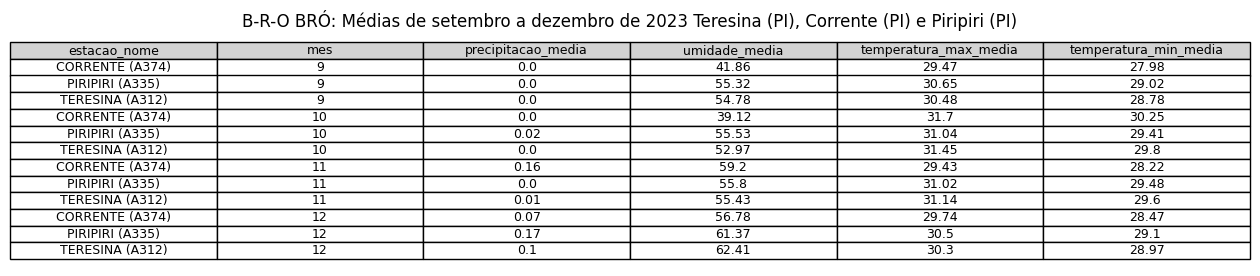

In [ ]:
tabela(medias, 'B-R-O BRÓ: Médias de setembro a dezembro de 2023 Teresina (PI), Corrente (PI) e Piripiri (PI)',
       tamanho = (16,3))

# Aula 5 - Trabalhando com filtros temporais em estações

## Buscando estações do estado do Amazonas

> A equipe deseja realizar uma análise específica das estações meteorológicas localizadas no estado do Amazonas (AM). Esse recorte geográfico é relevante porque o Amazonas possui uma grande diversidade climática e desempenha um papel importante no equilíbrio ambiental, influenciando padrões de precipitação e temperatura. Ao filtrar os dados apenas para este estado, será possível investigar com maior precisão variações meteorológicas e correlacioná-las com fenômenos naturais ou impactos ambientais.

<font size=2>[Fonte.](https://www.greenpeace.org/brasil/blog/clima-da-amazonia/)</font><br>


In [ ]:
url_c = ''

In [ ]:
ce = pl.read_csv(url_c,separator=';')
ce.head()

DC_NOME,SG_ESTADO,CD_SITUACAO,VL_LATITUDE,VL_LONGITUDE,VL_ALTITUDE,DT_INICIO_OPERACAO,CD_ESTACAO
str,str,str,str,str,str,str,str
"""ABROLHOS""","""BA""","""Pane""","""-17,96305555""","""-38,70333333""","""20,93""","""20/07/2008""","""A422"""
"""ACARAU""","""CE""","""Pane""","""-3,1211111""","""-40,08722221""","""67,15""","""21/04/2009""","""A360"""
"""AFONSO CLAUDIO""","""ES""","""Operante""","""-20,10416666""","""-41,10694444""","""507,48""","""23/09/2011""","""A657"""
"""AGUA BOA""","""MT""","""Operante""","""-14,01638888""","""-52,21166666""","""440""","""15/12/2006""","""A908"""
"""AGUA CLARA""","""MS""","""Operante""","""-20,44444444""","""-52,87583332""","""323,63""","""13/08/2010""","""A756"""


| Nome             | Descrição      | Tipo    |
|-----------------------|---------------------|---------|
| **DC_NOME**      | Nome do local ou denominação da estação meteorológica| STRING  |
| **SG_ESTADO**    | Sigla do Estado onde se localiza a estação | STRING  |
| **CD_SITUACAO**  | Situação operacional da estação                           | STRING  |
| **VL_LATITUDE**  | Latitude da estação | STRING  |
| **VL_LONGITUDE** | Longitude da estação| STRING  |
| **VL_ALTITUDE**  | Altitude da estação       | STRING  |
| **DT_INICIO_OPERACAO**| Data de início de operação da estação | STRING  |
| **CD_ESTACAO**   | Código único que identifica a estação  | STRING  |

In [ ]:
ce_am = ce.filter(pl.col('SG_ESTADO')=='AM').select(['DC_NOME','CD_ESTACAO'])
ce_am

DC_NOME,CD_ESTACAO
str,str
"""APUI""","""A113"""
"""AUTAZES""","""A120"""
"""BARCELOS""","""A128"""
"""BOCA DO ACRE""","""A110"""
"""COARI""","""A117"""
…,…
"""PARINTINS""","""A123"""
"""PRESIDENTE FIGUEIREDO""","""A126"""
"""RIO URUBU""","""A125"""


In [ ]:
dm_am = dm.filter(pl.col('id_estacao').is_in(ce_am['CD_ESTACAO']))
dm_am

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64
2023,2023-01-01,00:00:00,"""A126""",0.0,1003.9,0.0,23.4,23.3,94,197,0.0
2023,2023-01-01,00:00:00,"""A121""",null,1006.0,0.0,23.6,23.3,94,295,0.8
2023,2023-01-01,00:00:00,"""A134""",0.0,1000.2,0.0,24.1,23.3,83,81,null
2023,2023-01-01,00:00:00,"""A123""",28.6,1009.3,1.3,25.4,22.9,98,187,4.6
2023,2023-01-01,00:00:00,"""A109""",null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…
2024,2024-05-30,23:00:00,"""A125""",0.0,1007.5,null,24.3,23.9,98,335,0.0
2024,2024-05-30,23:00:00,"""A111""",0.0,1007.1,1.7,26.7,25.6,74,261,0.1
2024,2024-05-30,23:00:00,"""A120""",0.0,1009.9,0.0,25.9,25.1,93,228,null


In [ ]:
dm_am = dm_am.join(ce_am,left_on='id_estacao', right_on='CD_ESTACAO',how = 'left')
dm_am

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade,DC_NOME
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64,str
2023,2023-01-01,00:00:00,"""A126""",0.0,1003.9,0.0,23.4,23.3,94,197,0.0,"""PRESIDENTE FIGUEIREDO"""
2023,2023-01-01,00:00:00,"""A121""",null,1006.0,0.0,23.6,23.3,94,295,0.8,"""ITACOATIARA"""
2023,2023-01-01,00:00:00,"""A134""",0.0,1000.2,0.0,24.1,23.3,83,81,null,"""S, G. DA CACHOEIRA"""
2023,2023-01-01,00:00:00,"""A123""",28.6,1009.3,1.3,25.4,22.9,98,187,4.6,"""PARINTINS"""
2023,2023-01-01,00:00:00,"""A109""",null,null,null,null,null,null,null,null,"""EIRUNEPE"""
…,…,…,…,…,…,…,…,…,…,…,…,…
2024,2024-05-30,23:00:00,"""A125""",0.0,1007.5,null,24.3,23.9,98,335,0.0,"""RIO URUBU"""
2024,2024-05-30,23:00:00,"""A111""",0.0,1007.1,1.7,26.7,25.6,74,261,0.1,"""LABREA"""
2024,2024-05-30,23:00:00,"""A120""",0.0,1009.9,0.0,25.9,25.1,93,228,null,"""AUTAZES"""


<font size=4>[`polars.DataFrame.join`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.join.html)</font><br>

In [ ]:
dm_am.write_csv('Dados meteorologicos - ESTACOES AM.csv')

## Trabalhando com intervalo de datas

> A equipe deseja analisar a variação das temperaturas máximas registradas nas estações meteorológicas do Amazonas ao longo do período do último ano. Esse tipo de análise permite identificar padrões sazonais, extremos térmicos e potenciais tendências climáticas que possam impactar a região. Essas variações podem auxiliar em estudos ambientais e na formulação de políticas públicas.


In [ ]:
data_inicio = pl.datetime(2023, 6, 1)
data_fim = pl.datetime(2024, 5, 30)

dm_am_filtrado = dm_am.filter(
    pl.col('data') >= data_inicio,
    pl.col('data') <= data_fim
)
dm_am_filtrado

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade,DC_NOME
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64,str
2023,2023-06-01,00:00:00,"""A144""",0.0,1008.0,null,26.8,26.6,95,318,0.2,"""NOVO ARIPUANA"""
2023,2023-06-01,00:00:00,"""A110""",0.0,1001.3,null,26.2,25.5,83,238,1.7,"""BOCA DO ACRE"""
2023,2023-06-01,00:00:00,"""A126""",null,null,null,null,null,null,null,null,"""PRESIDENTE FIGUEIREDO"""
2023,2023-06-01,00:00:00,"""A128""",0.0,1007.6,0.0,26.6,26.1,92,9,0.0,"""BARCELOS"""
2023,2023-06-01,00:00:00,"""A133""",0.0,1007.5,null,25.9,25.5,86,210,1.0,"""MANICORE"""
…,…,…,…,…,…,…,…,…,…,…,…,…
2024,2024-05-30,23:00:00,"""A125""",0.0,1007.5,null,24.3,23.9,98,335,0.0,"""RIO URUBU"""
2024,2024-05-30,23:00:00,"""A111""",0.0,1007.1,1.7,26.7,25.6,74,261,0.1,"""LABREA"""
2024,2024-05-30,23:00:00,"""A120""",0.0,1009.9,0.0,25.9,25.1,93,228,null,"""AUTAZES"""


<font size=4>[`polars.datetime`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.datetime.html)</font><br>

In [ ]:
dm_am_filtrado = dm_am_filtrado.with_columns(
    pl.col('data').dt.month().alias('mes')
)
dm_am_filtrado

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade,DC_NOME,mes
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64,str,i8
2023,2023-06-01,00:00:00,"""A144""",0.0,1008.0,null,26.8,26.6,95,318,0.2,"""NOVO ARIPUANA""",6
2023,2023-06-01,00:00:00,"""A110""",0.0,1001.3,null,26.2,25.5,83,238,1.7,"""BOCA DO ACRE""",6
2023,2023-06-01,00:00:00,"""A126""",null,null,null,null,null,null,null,null,"""PRESIDENTE FIGUEIREDO""",6
2023,2023-06-01,00:00:00,"""A128""",0.0,1007.6,0.0,26.6,26.1,92,9,0.0,"""BARCELOS""",6
2023,2023-06-01,00:00:00,"""A133""",0.0,1007.5,null,25.9,25.5,86,210,1.0,"""MANICORE""",6
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024,2024-05-30,23:00:00,"""A125""",0.0,1007.5,null,24.3,23.9,98,335,0.0,"""RIO URUBU""",5
2024,2024-05-30,23:00:00,"""A111""",0.0,1007.1,1.7,26.7,25.6,74,261,0.1,"""LABREA""",5
2024,2024-05-30,23:00:00,"""A120""",0.0,1009.9,0.0,25.9,25.1,93,228,null,"""AUTAZES""",5


In [ ]:
tabela_temp_max = dm_am_filtrado.pivot(
    values='temperatura_max',
    index = 'mes',
    on = 'DC_NOME',
    aggregate_function = 'max',
    maintain_order = True
)
tabela_temp_max

mes,NOVO ARIPUANA,BOCA DO ACRE,PRESIDENTE FIGUEIREDO,BARCELOS,MANICORE,COARI,HUMAITA,PARINTINS,ITACOATIARA,MAUES,MANACAPURU,"S, G. DA CACHOEIRA",URUCARA,MANAUS,RIO URUBU,AUTAZES,LABREA,EIRUNEPE,APUI
i8,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
6,34.2,35.5,33.7,33.1,35.1,34.5,34.5,34.0,33.2,null,34.3,34.0,33.6,34.3,33.1,34.7,34.3,null,29.6
7,36.4,36.7,32.7,33.5,37.9,36.7,35.9,35.2,35.8,null,35.9,33.6,33.9,35.5,34.6,35.5,36.5,null,34.2
8,37.6,38.3,null,35.4,38.0,37.6,37.0,36.7,37.0,null,36.6,35.8,35.4,37.7,36.8,37.7,37.0,null,34.8
9,38.6,38.8,null,37.8,39.0,39.3,38.9,37.2,37.9,null,39.1,37.4,37.3,38.7,37.7,38.5,37.6,null,36.5
10,40.5,39.7,null,38.1,39.4,39.6,38.0,38.4,39.5,null,39.5,37.8,38.0,39.2,38.5,39.0,37.8,null,38.4
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,34.5,34.6,null,36.1,35.5,35.7,35.4,34.9,34.3,null,34.2,35.7,34.1,35.2,33.7,35.2,35.1,null,34.4
2,36.1,35.5,null,36.7,36.7,36.3,35.3,35.3,34.9,null,35.2,37.5,34.0,36.2,34.3,35.2,35.7,null,null
3,35.3,35.8,null,35.2,36.1,36.1,36.4,35.7,35.0,null,35.2,35.9,34.0,35.1,34.5,35.3,35.4,null,22.8


<font size=4>[`polars.DataFrame.pivot`](https://docs.pola.rs/api/python/stable/reference/dataframe/api/polars.DataFrame.pivot.html)</font><br>

In [ ]:
tabela_temp_max.write_csv('Temperaturas máximas por estacao AM.csv')

## Filtrando dados por horários

> A equipe busca compreender como as temperaturas máximas e mínimas variam ao longo do dia durante o último ano na cidade de Manaus. Analisar as temperaturas por períodos do dia (manhã, tarde e noite) pode fornecer insights importantes sobre padrões térmicos e sua variação sazonal.

In [ ]:
dm_manaus = dm_am_filtrado.filter(pl.col('DC_NOME')=='MANAUS')
dm_manaus.head()

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade,DC_NOME,mes
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64,str,i8
2023,2023-06-01,00:00:00,"""A101""",0.0,1006.4,0.0,28.4,28.0,74,54,1.6,"""MANAUS""",6
2023,2023-06-01,01:00:00,"""A101""",0.0,1007.0,0.0,28.1,27.8,73,72,1.7,"""MANAUS""",6
2023,2023-06-01,02:00:00,"""A101""",0.0,1007.6,0.0,28.0,27.6,75,105,1.1,"""MANAUS""",6
2023,2023-06-01,03:00:00,"""A101""",0.0,1007.6,0.0,27.8,27.2,80,76,1.5,"""MANAUS""",6
2023,2023-06-01,04:00:00,"""A101""",0.0,1007.6,0.0,27.2,26.8,83,70,1.5,"""MANAUS""",6


In [ ]:
manha = pl.time(6,0,0)
tarde = pl.time(12,0,0)
noite = pl.time(18,0,0)

dm_manaus = dm_manaus.with_columns(
    pl.when((pl.col('hora') >= manha)&(pl.col('hora') < tarde)).then(pl.lit('1 - Manhã'))
    .when((pl.col('hora')>=tarde) & (pl.col('hora')<noite)).then(pl.lit('2 - Tarde'))
    .otherwise(pl.lit('3 - Noite'))
    .alias('periodo_dia')
)
dm_manaus

ano,data,hora,id_estacao,precipitacao_total,pressao_atm_hora,radiacao_global,temperatura_max,temperatura_min,umidade_rel_hora,vento_direcao,vento_velocidade,DC_NOME,mes,periodo_dia
i64,date,time,str,f64,f64,f64,f64,f64,i64,i64,f64,str,i8,str
2023,2023-06-01,00:00:00,"""A101""",0.0,1006.4,0.0,28.4,28.0,74,54,1.6,"""MANAUS""",6,"""3 - Noite"""
2023,2023-06-01,01:00:00,"""A101""",0.0,1007.0,0.0,28.1,27.8,73,72,1.7,"""MANAUS""",6,"""3 - Noite"""
2023,2023-06-01,02:00:00,"""A101""",0.0,1007.6,0.0,28.0,27.6,75,105,1.1,"""MANAUS""",6,"""3 - Noite"""
2023,2023-06-01,03:00:00,"""A101""",0.0,1007.6,0.0,27.8,27.2,80,76,1.5,"""MANAUS""",6,"""3 - Noite"""
2023,2023-06-01,04:00:00,"""A101""",0.0,1007.6,0.0,27.2,26.8,83,70,1.5,"""MANAUS""",6,"""3 - Noite"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024,2024-05-30,19:00:00,"""A101""",0.0,1006.2,855.5,28.2,27.3,76,207,1.5,"""MANAUS""",5,"""3 - Noite"""
2024,2024-05-30,20:00:00,"""A101""",0.0,1005.7,563.6,27.7,27.1,77,150,0.9,"""MANAUS""",5,"""3 - Noite"""
2024,2024-05-30,21:00:00,"""A101""",0.0,1005.7,236.8,27.3,26.7,80,114,0.6,"""MANAUS""",5,"""3 - Noite"""


<font size=4>[`polars.time`](https://docs.pola.rs/api/python/stable/reference/expressions/api/polars.time.html)</font><br>

In [ ]:
medias_temp = dm_manaus.group_by(['mes','periodo_dia']).agg([
    pl.col('temperatura_max').mean().alias('temperatura_max_media'),
    pl.col('temperatura_min').mean().alias('temperatura_min_media')
])
medias_temp

mes,periodo_dia,temperatura_max_media,temperatura_min_media
i8,str,f64,f64
5,"""3 - Noite""",28.400556,27.585556
11,"""1 - Manhã""",27.612222,26.932222
11,"""3 - Noite""",31.12906,30.11453
4,"""3 - Noite""",28.688056,27.759722
2,"""2 - Tarde""",30.189655,28.596552
…,…,…,…
8,"""2 - Tarde""",32.946774,30.951613
4,"""2 - Tarde""",29.711667,28.161111
11,"""2 - Tarde""",31.972222,30.210556


In [ ]:
medias_temp.write_csv('Temperaturas mensais - MANAUS - periodo do dia.csv')